## Import

In [1]:
%reload_ext watermark
%reload_ext autoreload
%autoreload 2
# %watermark -p numpy,sklearn,pandas
# %watermark -p ipywidgets,cv2,PIL,matplotlib,plotly,netron
# %watermark -p torch,torchvision,torchaudio
# %watermark -p tensorflow,tensorboard,tflite
# %watermark -p onnx,tf2onnx,onnxruntime,tensorrt,tvm
# %matplotlib inline
# %config InlineBackend.figure_format='retina'
# %config IPCompleter.use_jedi = False

%matplotlib widget
from IPython.display import display, Markdown, HTML, IFrame, Video, Image, Javascript
# from IPython.core.magic import register_line_cell_magic, register_line_magic, register_cell_magic
# display(HTML('<style>.container { width:%d%% !important; }</style>' % 90))

import sys, os, io, logging, time, random, math
import json, base64, requests, shutil
import argparse, shlex, signal
import numpy as np

argparse.ArgumentParser.exit = lambda *arg, **kwargs: _IGNORE_

def _IMPORT(x):
    try:
        x = x.strip()
        if x[0] == '/' or x[1] == '/':
            with open(x) as fr:
                x = fr.read()
        elif 'github' in x or 'gitee' in x:
            if x.startswith('import '):
                x = x[7:]
            if x.startswith('https://'):
                x = x[8:]
            if not x.endswith('.py'):
                x = x + '.py'
            x = x.replace('blob/main/', '').replace('blob/master/', '')
            if x.startswith('raw.githubusercontent.com'):
                x = 'https://' + x
                x = requests.get(x)
                if x.status_code == 200:
                    x = x.text
            elif x.startswith('github.com'):
                x = x.replace('github.com', 'raw.githubusercontent.com')
                mod = x.split('/')
                for s in ['/main/', '/master/']:
                    x = 'https://' + '/'.join(mod[:3]) + s + '/'.join(mod[-3:])
                    x = requests.get(x)
                    if x.status_code == 200:
                        x = x.text
                        break
            elif x.startswith('gitee.com'):
                mod = x.split('/')
                for s in ['/raw/main/', '/raw/master/']:
                    x = 'https://' + '/'.join(mod[:3]) + s + '/'.join(mod[3:])
                    x = requests.get(x)
                    if x.status_code == 200:
                        x = x.text
                        break
        exec(x, globals())
    except Exception as err:
        # sys.stderr.write(f'request {x} : {err}')
        pass

def _DIR(x, dumps=True, ret=True):
    attrs = sorted([y for y in dir(x) if not y.startswith('_')])
    result = '%s: %s' % (str(type(x))[8:-2], json.dumps(attrs) if dumps else attrs)
    if ret:
        return result
    print(result)

###
### Display ###
###

_IMPORT('import pandas as pd')
_IMPORT('import cv2')
_IMPORT('from PIL import Image')
_IMPORT('import matplotlib.pyplot as plt')
_IMPORT('import plotly')
_IMPORT('import plotly.graph_objects as go')
_IMPORT('import ipywidgets as widgets')
_IMPORT('from ipywidgets import interact, interactive, fixed, interact_manual')

# plotly.offline.init_notebook_mode(connected=False)

plt.rcParams['figure.figsize'] = (12.0, 8.0)

###
### Display ###
###

_IMPORT('import pandas as pd')
_IMPORT('import cv2')
_IMPORT('from PIL import Image')
_IMPORT('import matplotlib.pyplot as plt')
_IMPORT('import plotly')
_IMPORT('import plotly.graph_objects as go')
_IMPORT('import ipywidgets as widgets')
_IMPORT('from ipywidgets import interact, interactive, fixed, interact_manual')

# plotly.offline.init_notebook_mode(connected=False)

plt.rcParams['figure.figsize'] = (12.0, 8.0)


# _IMPORT('gitee.com/qrsforever/nb_easy/easy_widget')


class COLORS(object):
    # BGR
    GREEN      = (0   , 255 , 0)
    RED        = (0   , 0   , 255)
    BLACK      = (0   , 0   , 0)
    YELLOW     = (0   , 255 , 255)
    WHITE      = (255 , 255 , 255)
    CYAN       = (255 , 255 , 0)
    MAGENTA    = (255 , 0   , 242)
    GOLDEN     = (32  , 218 , 165)
    LIGHT_BLUE = (255 , 9   , 2)
    PURPLE     = (128 , 0   , 128)
    CHOCOLATE  = (30  , 105 , 210)
    PINK       = (147 , 20  , 255)
    ORANGE     = (0   , 69  , 255)


def show_image(imgsrc, width=None, height=None, rgb=True):
    if isinstance(imgsrc, np.ndarray):
        img = imgsrc
        if width or height:
            if width and height:
                size = (width, height)
            else:
                rate = img.shape[1] / img.shape[0]
                if width:
                    size = (width, int(width/rate))
                else:
                    size = (int(height*rate), height)
            img = cv2.resize(img, size)
            plt.figure(figsize=(3*int(size[0]/80+1), 3*int(size[1]/80+1)), dpi=80)
        plt.axis('off')
        if len(img.shape) > 2:
            if not rgb:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img);
        else:
            plt.imshow(img, cmap='gray');
        return

    W, H = '', ''
    if width:
        W = 'width=%d' % width
    if height:
        H = 'height=%d' % height
    if imgsrc.startswith('http'):
        data_url = imgsrc
    else:
        if len(imgsrc) > 2048:
            data_url = 'data:image/jpg;base64,' + imgsrc
        else:
            img = open(imgsrc, 'rb').read()
            data_url = 'data:image/jpg;base64,' + base64.b64encode(img).decode()
    return HTML('<center><img %s %s src="%s"/></center>' % (W, H, data_url))


## Global Variabals

In [2]:
# Variabals Folder

cos_prefix = 'https://datasets-1301930378.cos.ap-beijing.myqcloud.com/notebook'

video_files = [
    f'{cos_prefix}/image_transform/videos/Circle-107602.mp4',
    f'{cos_prefix}/aluminium/videos/20220904150643.mp4',
    f'{cos_prefix}/aluminium/videos/20220904164651.mp4',
    f'{cos_prefix}/aluminium/videos/20220904142642.mp4',
    f'{cos_prefix}/aluminium/videos/20220904144642.mp4',
    f'{cos_prefix}/aluminium/videos/20220904155649.mp4',
    f'{cos_prefix}/aluminium/videos/20220904141641.mp4',
    f'{cos_prefix}/aluminium/videos/20220904140641.mp4',
]

image_files = [
    f'{cos_prefix}/image_transform/images/tangent_line.png',
]

kernel_list = (3, 5, 9, 11, 15, 27)

thresh_types = [                # < thresh |  >=
    'cv2.THRESH_BINARY',        # 0        | maxval
    'cv2.THRESH_BINARY_INV',    # maxval   | 0
    'cv2.THRESH_TRUNC',         # nochange | thresh
    'cv2.THRESH_TOZERO',        # 0        | nochange
    'cv2.THRESH_TOZERO_INV'     # nochange | 0
]

binary_thresh_method = [
    'cv2.THRESH_OTSU',          # thresh set 0, auto find, 适合直方图存在双峰
    'cv2.THRESH_TRIANGLE',       
    'cv2.THRESH_MASK',
]

retrieval_mode = [
    'cv2.RETR_EXTERNAL',        # retrieves only the extreme outer contours
    'cv2.RETR_LIST',            # retrieves all of the contours without establishing any hierarchical relationships
    'cv2.RETR_CCOMP',           # retrieves all of the contours and organizes them into a two-level hierarchy
    'cv2.RETR_TREE',            # retrieves all of the contours and reconstructs a full hierarchy of nested contours
]

approx_method = [
    'cv2.CHAIN_APPROX_NONE',    # stores absolutely all the contour points
    'cv2.CHAIN_APPROX_SIMPLE',  # compresses horizontal, vertical, and diagonal segments and leaves only their end points
]

## Define Functions

In [3]:
# Import Folder

from scipy import interpolate
from scipy.signal import find_peaks
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator

def calculate_center_pointer(point1, point2):
    cx = 0.5 * (point1[0] + point2[0])
    cy = 0.5 * (point1[1] + point2[1]) 
    return cx, cy

def image_as_array(img_bytes, unchange=True):
    if unchange:
        return cv2.imdecode(np.frombuffer(img_bytes, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
    else:
        return cv2.imdecode(np.frombuffer(img_bytes, dtype=np.uint8), cv2.IMREAD_COLOR)

### Image Transform

In [4]:
# Transform Folder

def _dotrans_gray_hsv(ctx, gray_hsv, img_bytes, w_gray_out):
    ctx.logger(gray_hsv, clear=True)
    if img_bytes:
        raw_img = image_as_array(img_bytes)
        if gray_hsv == 'Gray':
            img =cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
        elif gray_hsv == 'HSV':
            """
            When dealing with color images it is first necessary to convert 
            from RGB to HSV since the dimensions of RGB are dependent on one another
            where as the three dimensions in HSV are independent of one another
            (this allows us to apply filters to each of the three dimensions separately.)
            """
            img =cv2.cvtColor(raw_img, cv2.COLOR_BGR2HSV)
        else:
            img = raw_img
        ctx.logger(f'{img.shape}')
        nbeasy_widget_display(img, w_gray_out)
        
def _dotrans_average_blur(ctx, kernel, img_bytes, w_blur_out, blur_index):
    if blur_index != 0 or not img_bytes:
        return
    ctx.logger(f'_dotrans_average_blur({kernel})')
    
    img = image_as_array(img_bytes)
    if kernel[0] > 0:
        img = cv2.blur(img, kernel)
    nbeasy_widget_display(img, w_blur_out)
        
def _dotrans_gaussian_blur(ctx, kernel, img_bytes, w_blur_out, blur_index):
    if blur_index != 1 or not img_bytes:
        return
    ctx.logger(f'_dotrans_gaussian_blur({kernel})')
    
    img = image_as_array(img_bytes)
    if kernel[0] > 0:
        img = cv2.GaussianBlur(img, kernel, 0)
    nbeasy_widget_display(img, w_blur_out)
        
def _dotrans_median_blur(ctx, kernel, img_bytes, w_blur_out, blur_index):
    if blur_index != 2 or not img_bytes:
        return
    ctx.logger(f'_dotrans_median_blur({kernel})')
    
    img = image_as_array(img_bytes)
    if kernel > 0:
        img = cv2.medianBlur(img, ksize=kernel)
    nbeasy_widget_display(img, w_blur_out)
    
        
def _dotrans_bilateral_blur(ctx, diameter, sigma_color, sigma_space, img_bytes, w_blur_out, blur_index):
    if blur_index != 3 or not img_bytes:
        return
    ctx.logger(f'_dotrans_bilateral_blur({diameter}, {sigma_color}, {sigma_space}')
    img = image_as_array(img_bytes)
    img = cv2.bilateralFilter(img, d=diameter, sigmaColor=sigma_color, sigmaSpace=sigma_space)
    nbeasy_widget_display(img, w_blur_out)

    
def _dotrans_binary_thresh(ctx, thresh_maxval, thresh_type, thresh_method, img_bytes, w_thresh_out, tab_index, navi_index):
    if tab_index != 2 or navi_index != 0 or not img_bytes:
        return
    ctx.logger(f'_dotrans_binary_thresh({thresh_maxval}, {thresh_type}, {thresh_method})')
    
    img = image_as_array(img_bytes)
    if len(img.shape) > 2:
        ctx.logger('Error, input is not binary image!')
        return
    if thresh_type >= 0:
        thresh, maxval = thresh_maxval
        if thresh_method == cv2.THRESH_OTSU:
            thresh = 0
        ret, img = cv2.threshold(img, thresh, maxval, thresh_type + thresh_method)
        ctx.logger(f'thresh: {ret}')
    nbeasy_widget_display(img, w_thresh_out)


### Edge Detector

In [5]:
# Detector Folder

def _do_canny_detect_edge(ctx, lower_upper, aperture_size, enable_l2gradient, img_bytes, w_thresh_out, tab_index, navi_index):
    if tab_index != 2 or navi_index != 2 or not img_bytes:
        return
    ctx.logger('_do_canny_detect_edge(%s, %d, %d)' % (lower_upper, aperture_size, enable_l2gradient))
    lower, upper = lower_upper
    img = image_as_array(img_bytes)
    img = cv2.Canny(img, lower, upper, apertureSize=aperture_size, L2gradient=enable_l2gradient)
    nbeasy_widget_display(img, w_thresh_out)

### Applications

In [6]:
# Application Folder

def find_valid_curves(contours, height, max_x_skip, max_y_skip, min_y_std, min_fit_ps):
    valid_points_curve_group = []
    for c in contours:
        points_unsort = c.copy().reshape(-1, 2)
        # covert coordinate 
        points_unsort[:, 1] = height - points_unsort[:, 1]
        points_sorted = np.asarray(sorted(points_unsort, key=operator.itemgetter(0)))

        x_skip_indexes = np.add(np.argwhere(np.diff(points_sorted[:, 0]) != 0).reshape(-1,), 1)
        x_skip_indexes_0 = np.insert(x_skip_indexes, 0, 0)
        x_skip_indexes_1 = np.roll(x_skip_indexes_0, -1)
        x_skip_indexes_1[-1] = len(points_sorted)
        x_skip_indexes = np.vstack([x_skip_indexes_0, x_skip_indexes_1]).T

        points_curve_group = []
        for xi, xj in x_skip_indexes:
            x_val = points_sorted[xi, 0]
            points = points_sorted[xi:xj]
            ys_sort = np.sort(points[:, 1])
            y_skip_indexes = np.argwhere(np.diff(np.sort(points[:, 1])) > max_y_skip)
            m = len(points)
            n = len(y_skip_indexes)
            if n == 0:
                n = 1
                y_skip_indexes = np.array([[m - 1]])

            y_skip_indexes = y_skip_indexes[0] if n == 1 else y_skip_indexes.squeeze()
            y_skip_indexes = np.add(y_skip_indexes, 1)
            if y_skip_indexes[-1] != m:
                y_skip_indexes = np.append(y_skip_indexes, m)
            pre = 0
            for idx in y_skip_indexes:
                y_hat = np.mean(ys_sort[pre:idx])
                pre = idx
                flg = 0
                for curve_points in points_curve_group:
                    cc = len(curve_points)
                    if cc > min_fit_ps:
                        ys = [xy[1] for xy in curve_points[-min_fit_ps:]]
                        if np.std(ys) < min_y_std:
                            points_curve_group.remove(curve_points)
                            continue
                    x, y = curve_points[-1]
                    x_skip, y_skip = abs(x - x_val), abs(y - y_hat)
                    if x_skip > max_x_skip and cc < min_fit_ps:
                        points_curve_group.remove(curve_points)
                        continue
                    if y_skip < max_y_skip and x_skip < max_x_skip:
                        flg = 1
                        curve_points.append((x_val, y_hat))
                        break
                if flg == 0:
                    points_curve_group.append([(x_val, y_hat)])

        for curve_points in points_curve_group:
            if len(curve_points) < min_fit_ps:
                continue
            
            valid_points_curve_group.append(np.array(curve_points))
    return valid_points_curve_group


def find_tangent(crests, trough, xs, ys, gradients):
    if len(crests) != 2:
        raise
    linear_reg = LinearRegression()
    linear_reg.fit(xs[crests][:, np.newaxis], ys[crests])
    ys_ = linear_reg.predict(xs[:, np.newaxis])
    intercept_indexes = np.squeeze(np.argwhere(np.diff(np.sign(ys - ys_)) != 0))
    
    def _gen_intercept_seq(indexes, limit_val, direction=0):
        if direction == 0: # left
            left = []
            r = np.argwhere(indexes == limit_val).reshape(-1,)
            if len(r) == 0:
                r = np.argwhere(indexes == (limit_val - 1)).reshape(-1,)
            r = r[-1]
            temp = [indexes[r]]
            for i in range(r - 1, -1, -1):
                if (limit_val - indexes[i]) <= 1: # TODO @'sign convert'
                    temp.insert(0, indexes[i])
                else:
                    left.extend(list(range(indexes[i], temp[0])))
                    break
            left.extend(temp)
            return left
        else:
            return []
    
    def _gen_tangent_point(low_seq, high_seq, gradients):
        _minp = None
        _minv = 1
        for i in low_seq:
            for j in high_seq:
                d = abs(gradients[i] - gradients[j])
                if d < _minv:
                    _minv = d
                    _minp = (i, j)
        return _minp
    
    # print(linear_reg.intercept_, linear_reg.coef_)
    theta = np.arctan(linear_reg.coef_[0])
    if linear_reg.intercept_ > 0:
        l_seq = _gen_intercept_seq(intercept_indexes, crests[0])
        r_seq = _gen_intercept_seq(intercept_indexes, crests[1])
        lo_idx, hi_idx = _gen_tangent_point(l_seq, r_seq, gradients)
        mi_idx, mi_val = -1, 1
        mi_grad = np.mean(gradients[[lo_idx, hi_idx]])
        for i in range(trough + 1, r_seq[0] - 100):
            d = abs(gradients[i] - mi_grad)
            if d < mi_val:
                mi_val = d
                mi_idx = i
        intercept_diff = float(ys[mi_idx] - linear_reg.predict(xs[mi_idx].reshape(-1, 1)))
        distance = intercept_diff * np.cos(theta)
        newx = xs[mi_idx] + distance * np.sin(theta)
        newy = linear_reg.predict(newx.reshape(-1, 1))[0]
        # print(distance, newx, newy, xs[mi_idx], ys[mi_idx])
        tl, tr = (xs[lo_idx], ys_[lo_idx]), (xs[hi_idx], ys_[hi_idx])
        bl = (xs[lo_idx], ys_[lo_idx] + intercept_diff)
        br = (xs[hi_idx], ys_[hi_idx] + intercept_diff)
        mi1 = (xs[mi_idx], ys[mi_idx])
        mi2 = (newx, newy)
        return tl, tr, br, bl, mi1, mi2, abs(intercept_diff), abs(distance)
    else:
        raise

In [7]:
# On Tab Envents

def _do_find_contours(
    ctx, mode, method, draw_color, draw_thickness, img_bytes,
    w_img_bytes_org, w_fc_out, min_area, max_area, tab_index, app_index):
    if app_index != 1 or tab_index != 3 or not img_bytes or not w_img_bytes_org.value:
        return
    
    ctx.logger(f'_do_find_contours({mode}, {method}, {draw_color}, {draw_thickness}, {min_area}, {max_area} {app_index})', clear=1)

    img_org = image_as_array(w_img_bytes_org.value, False)
    img_bin = image_as_array(img_bytes)
    ctx._fc_contours = None
    contours, hierarchy = cv2.findContours(img_bin, mode, method) 
    ctx.logger(f'find contours count: {len(contours)}')
    if min_area > 0 and min_area < max_area:
        valid_contours = []
        for c in contours:
            area = cv2.contourArea(c)
            ctx.logger(f'find contours count: {area}')
            if min_area < area and area < max_area:
                valid_contours.append(c)
        contours = valid_contours

    if len(contours) > 0:
        cv2.drawContours(img_org, contours, -1, draw_color, draw_thickness)
        ctx._fc_contours = contours
    nbeasy_widget_display(img_org, w_fc_out)
    
    
def _do_find_tangent(ctx, max_x_skip, max_y_skip, min_y_std, min_fit_ps, poly_degree, navi_index, tab_index, fc_bytes, w_fct_navi_out):
    if not fc_bytes or not hasattr(ctx, '_fc_contours') or navi_index != 1 or tab_index != 3:
        return
    ctx.logger('_do_find_tangent(%d, %d, %d, %d, %.2f, %d)' % (
        max_x_skip, max_y_skip, min_y_std, min_fit_ps, poly_degree, navi_index), clear=True)
    fc_img = image_as_array(fc_bytes, False)
    ctx.logger(f'{ctx._fc_contours[0].squeeze().shape}')
    curves_points = find_valid_curves(ctx._fc_contours, fc_img.shape[0], max_x_skip, max_y_skip, min_y_std, min_fit_ps)
    if len(curves_points) == 0:
        ctx.logger('@err _do_find_tangent: no found valid curves!')
        return

    poly_feat = PolynomialFeatures(degree=poly_degree)
    linear_reg = LinearRegression()
    
    with w_fct_navi_out:
        w_fct_navi_out.clear_output()
        plt.close('fct')  
        fig, axes = plt.subplots(1, 2, figsize=(12, 6), label='fct')
        fig.canvas.toolbar_visible = True
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = True
        fig.canvas.toolbar_position = 'right'
        w_fct_navi_out.fig = fig
        
        for i, curve in enumerate(curves_points):
            cc = len(curve)
            poly_xs = poly_feat.fit_transform(curve[:, 0].reshape(-1, 1))
            linear_reg.fit(poly_xs, curve[:, 1])
            poly_ys = linear_reg.predict(poly_xs)
            
            poly_feat.get_feature_names_out()
            ctx._poly_feat = poly_feat
            
            curve_xs = np.arange(int(np.min(curve[:, 0])), int(np.max(curve[:, 0])), 0.2)
            curve_ys = linear_reg.predict(poly_feat.fit_transform(curve_xs.reshape(-1, 1)))
            
            # params = list(zip(np.round(linear_reg.coef_, 3), poly_feat.get_feature_names_out()))
            # equation = 'f = %.4f' % params[0][0]
            # for a, b in params[1:]:
            #     b = b.replace('x0', 'x').replace('x1', 'y')
            #     if a != 0:
            #         if a < 0:
            #             equation += ' - %.4f%s' % (abs(a), b)
            #         else:
            #             equation += ' + %.4f%s' % (a, b)
            #             
            # axes[0].text(0.5, -0.5, r'${%s}$' % equation, backgroundcolor='0.85', alpha=.9, ha='center', va='bottom')
            axes[0].scatter(curve[:, 0], curve[:, 1], label='%d: %d' % (i, cc), alpha=0.3)
            axes[0].plot(curve_xs, curve_ys, label='fit %d:%d' % (i, cc))
            axes[0].legend()
            
            crest_points = find_peaks(curve_ys)[0]
            trough_points = find_peaks(-curve_ys)[0]
            gradients = np.gradient(curve_ys)
            
            if len(crest_points) != 2 and len(trough_points) != 1:
                ctx.logger('Not impl yet!')
            else:
                try:
                    tl, tr, br, bl, mi1, mi2, y_diff, distance = find_tangent(
                        crest_points[:2], trough_points[0], curve_xs, curve_ys, gradients)
                except Exception:
                    ctx.logger('Can not found valid curve')
                    continue
                
                axes[1].plot(curve_xs, curve_ys)
                axes[1].plot([tl[0], tr[0]], [tl[1], tr[1]])
                axes[1].plot([bl[0], br[0]], [bl[1], br[1]])
                cx, cy = calculate_center_pointer(mi1, mi2)
                axes[1].plot([mi1[0], mi2[0]], [mi1[1], mi2[1]])
                axes[1].annotate('%.3f' % distance, (cx, cy), (cx + 5, cy))

                bx, by = calculate_center_pointer(tl, bl)
                axes[1].plot([tl[0], bl[0]], [tl[1], bl[1]])
                axes[1].annotate('%.3f' % y_diff, (bx, by), (bx + 5, by))

        plt.show(fig)

## Schema Template

In [8]:
# Json Folder

_IMPORT('./easy_widget.py')

## tab: Gray/HSV
tab_gray_hsv = {
    'name': 'Gray & HSV',
    'objs': [
        {
            'type': 'V',
            'objs': [
                nbeasy_widget_togglebuttons('cfg.gray_hsv', label='Gray/HSV', enums=['Gray', 'HSV'], style='info'),
                nbeasy_widget_image('__cfg.gray_image', width=640, height=352),
            ],
            'align_items': 'center'
        },
    ]
}

## tab: Smooth&Blur
tab_smooth_blur = {
    'name': 'Smooth & Blur',
    'objs': [
        {
            'type': 'V',
            'objs': [
                {
                    '_id_': '__cfg.blur_navi',
                    'type': 'navigation',
                    'objs': [
                        {
                            'type': 'H',
                            'name': 'Average',
                            'objs': [
                                nbeasy_widget_stringenum(
                                    'cfg.blur_average_kernel', 'Kernel', default=0,
                                    enums=[('None', (0, 0))] + [(f'{x} X {x}', (x, x)) for x in kernel_list]
                                ),
                            ],
                            'justify_content': 'flex-start',
                        },
                        {
                            'type': 'H',
                            'name': 'Gaussian',
                            'objs': [
                                nbeasy_widget_stringenum(
                                    'cfg.blur_gaussian_kernel', 'Kernel', default=0,
                                    enums=[('None', (0, 0))] + [(f'{x} X {x}', (x, x)) for x in kernel_list]
                                ),
                                nbeasy_widget_label('cfg.gaussian_todo', '', 'TODO'),
                            ]
                        },
                        {
                            'type': 'H',
                            'name': 'Median',
                            'objs': [
                                nbeasy_widget_stringenum(
                                    'cfg.blur_median_kernel', 'Kernel', default=0,
                                    enums=[('None', 0)] + [(f'{x} X {x}', x) for x in kernel_list]
                                ),
                                nbeasy_widget_label('cfg.median_todo', '', 'TODO'),
                            ]
                        },
                        {
                            'type': 'H',
                            'name': 'Bilateral', # reduce noise while still maintaining edges
                            'objs': [
                                nbeasy_widget_int('cfg.bilateral_diameter', 'Diameter', 5, width=300, description_width=80),
                                nbeasy_widget_int('cfg.bilateral_sigma_color', 'Sigma Color', 50, width=300, description_width=80),
                                nbeasy_widget_int('cfg.bilateral_sigma_space', 'Sigma Space', 50, width=300, description_width=80),
                            ]
                        },
                    ]
                },
                nbeasy_widget_image('__cfg.blur_image', width=640, height=352, plt=True),
            ],
            'align_items': 'center'
        }
    ]
}

## tab: Bin Threshold
tab_thresh_edge = {
    'name': 'Threshold & Edge',
    'objs': [
        {
            'type': 'V',
            'objs': [
                {
                    '_id_': '__cfg.navi_thresh_edge',
                    'type': 'navigation',
                    'objs': [
                        {
                            'type': 'H',
                            'name': 'Binary Threshold',
                            'objs': [
                                nbeasy_widget_int('cfg.b_thresh_maxval', 'Thresh-MaxVal', (127, 255), min_=0, max_=255, range_=True, width=550),
                                nbeasy_widget_stringenum(
                                    'cfg.b_thresh_type', 'Type', 0,
                                    enums=[(x.split('.')[1], eval(x)) for x in thresh_types],
                                    width=350,
                                ),
                                nbeasy_widget_stringenum(
                                    'cfg.b_thresh_method', 'Method', 0,
                                    enums=[('None', 0)] + [(x.split('.')[1], eval(x)) for x in binary_thresh_method],
                                    width=350,
                                ),
                            ],
                            'justify_content': 'flex-start',
                        },
                        {
                            'type': 'H',
                            'name': 'Adaptive Threshold',
                            'objs': [
                                nbeasy_widget_label('cfg.athreshold_todo', '', 'TODO'),
                                nbeasy_widget_int('cfg.athreshold_maxval', 'MaxVal'),
                            ],
                            'justify_content': 'flex-start',
                        },
                        {
                            'type': 'H',
                            'name': 'Canny Edge',
                            'objs': [
                                nbeasy_widget_int('cfg.ce_lower_upper', 'Lower-Upper', (50, 150), min_=1, max_=255, range_=True, width=550),
                                nbeasy_widget_stringenum(
                                    'cfg.ce_kernel_size', 'ApertureSize', 0,
                                    enums=[(str(x), x) for x in range(3, 15, 2)],
                                    width=350),
                                nbeasy_widget_bool('cfg.ce_l2gradient', 'L2 Grad', False, description_width=100),
                            ],
                        },
                    ],
                },
                nbeasy_widget_image('__cfg.thresh_image', width=640, height=352, plt=True),
            ],
            'align_items': 'center'
        },
    ]
}

## accordion: edge detect
accordion_edge_detect = {
    'name': 'Edge Detect',
    'objs': [
        nbeasy_widget_label('cfg.edge_todo', '', 'TODO'),
    ]
}

## navigation: curve tangent
navi_curve_tangent = {
    'type': 'V',
    'name': 'Curve Tangent',
    'objs': [
        {
            'type': 'V',
            'objs': [
                {
                    'type': 'H',
                    'objs': [
                        nbeasy_widget_int('cfg.fct_max_x_skip', 'Max X Skip', 5, min_=1, max_=20, slider=True, step=1, width=300, description_width=80),
                        nbeasy_widget_int('cfg.fct_max_y_skip', 'Max y Skip', 6, min_=1, max_=20, slider=True, step=1, width=300, description_width=80),
                        nbeasy_widget_float('cfg.fct_min_y_std', 'Min y Std', 1, width=300, description_width=80),
                        nbeasy_widget_int('cfg.fct_min_fit_ps', 'Min Points', 50, width=300, description_width=80),
                    ],
                },
                {
                    'type': 'H',
                    'objs': [
                        nbeasy_widget_int('cfg.fct_poly_degree', 'Poly Degree', 4, width=300, description_width=80),
                    ]
                },
            ],
            'justify_content': 'flex-start',
        },
        nbeasy_widget_output('__cfg.fct_navi_image'),
    ],
    'align_items': 'center'
}


## accordion: find contours
accordion_find_contours = {
    'name': 'Find Contours',
    'objs': [
        {
            'type': 'V',
            'objs': [
                {
                    'type': 'H',
                    'objs': [
                        nbeasy_widget_stringenum(
                            'cfg.fc_mode', 'Mode', 0,
                            enums=[(x.split('.')[1], eval(x)) for x in retrieval_mode],
                            width=300, description_width=80,
                        ),
                        nbeasy_widget_stringenum(
                            'cfg.fc_method', 'Method', 0,
                            enums=[(x.split('.')[1], eval(x)) for x in approx_method],
                            width=300, description_width=80,
                        ),
                        nbeasy_widget_stringenum(
                            'cfg.fc_draw_color', 'Color', 0,
                            enums=[(k, getattr(COLORS, k)) for k, v in COLORS.__dict__.items() if k[0] != '_'],
                            width=300, description_width=80,
                        ),
                        nbeasy_widget_int(
                            'cfg.fc_draw_thickness', 'Thickness', 3,
                            min_=-1, max_=10, step=1, slider=True,
                            width=350, description_width=100,
                        ),
                    ],
                    'justify_content': 'flex-start',
                },
                {
                    'type': 'H',
                    'objs': [
                        nbeasy_widget_int( 'cfg.fc_min_area', 'Min Area', -1, width=300, description_width=80),
                        nbeasy_widget_int( 'cfg.fc_max_area', 'Max Area', -1, width=300, description_width=80),
                    ],
                    'justify_content': 'flex-start',
                },
                nbeasy_widget_image('__cfg.fc_image', width=640, height=352),
            ],
            'align_items': 'center'
        },
        {
            'type': 'V',
            'objs': [
                {
                    'type': 'navigation',
                    '_id_': '__cfg.fc_navigation',
                    'objs': [
                        {
                            'type': 'H',
                            'name': 'TODO',
                            'objs': [
                                nbeasy_widget_hline(),
                            ]
                        },
                        navi_curve_tangent,
                        {
                            'type': 'H',
                            'name': 'Distance Measure',
                            'objs': [
                                nbeasy_widget_label('cfg.distance_measure_todo', '', 'TODO'),
                            ],
                            'justify_content': 'flex-start',
                        },
                    ],
                },
            ],
        },
    ]
}


schema = {
    'type': 'page',
    'objs': [
        nbeasy_widget_hline(),
        {
            'type': 'H',
            'objs': [
                {
                    'type': 'V',
                    'objs': [
                        nbeasy_widget_video('__cfg.video', 'Video', video_files[0], width=640, height=352, btn_snapshot=True),
                        nbeasy_widget_stringenum(
                            'cfg.video_url', 'Video', 0,
                            enums=[(os.path.basename(url),  url) for url in video_files],
                            width=300, description_width=50
                        ),
                        nbeasy_widget_bytes('cfg.video_url_show', 'Url', video_files[0], width=640, description_width=30),
                    ],
                    'align_items': 'center',
                    'width': '50%'
                },
                {
                    'type': 'V',
                    'objs': [
                        nbeasy_widget_image('__cfg.image', 'Image', image_files[0], width=640, height=352, e_onclick=True),
                        nbeasy_widget_stringenum(
                            'cfg.image_url', 'Image', 0,
                            enums=[(os.path.basename(url),  url) for url in image_files],
                            width=300, description_width=50
                        ),
                        nbeasy_widget_bytes('cfg.image_url_show', 'Url', image_files[0], width=640, description_width=30),
                    ],
                    'align_items': 'center',
                    'width': '50%'
                }
            ],
            'align_items': 'flex-end', # bottom align
        }, # video and image
        nbeasy_widget_hline(),
        {
            '_id_': '__cfg.page_tab',
            'type': 'tab',
            'objs': [
                tab_gray_hsv,
                tab_smooth_blur,
                tab_thresh_edge,
                {
                    'name': 'Applications',
                    'objs': [
                        {
                            '_id_': '__cfg.fc_accordion',
                            'type': 'accordion',
                            'objs': [
                                accordion_edge_detect,
                                accordion_find_contours,
                            ],
                            'selected_index': 1,
                        },
                    ],
                }, # Contours
            ]
        }, # tab
    ],
    'evts': [
        {
            'type': 'jsdlink',
            'objs': [
                {
                    'source': '__cfg.video:imgbytes',
                    'target': '__cfg.image:value'
                },
                {
                    'source': 'cfg.video_url:value',
                    'target': 'cfg.video_url_show:value'
                },
                {
                    'source': 'cfg.video_url_show:bvalue',
                    'target': '__cfg.video:value'
                },
                {
                    'source': 'cfg.image_url:value',
                    'target': 'cfg.image_url_show:value'
                },
                {
                    'source': 'cfg.image_url_show:bvalue',
                    'target': '__cfg.image:value'
                },
            ]
        }, # jsdlink
        {
            'type': 'interactiveX',
            'objs': [
                {
                    'handler': _dotrans_gray_hsv,
                    'params': {
                        'gray_hsv': 'cfg.gray_hsv',
                        'img_bytes': '__cfg.image',
                        'w_gray_out': '__cfg.gray_image',
                    }
                }, # gray
                {
                    'handler': _dotrans_average_blur,
                    'params': {
                        'kernel': 'cfg.blur_average_kernel',
                        'img_bytes': '__cfg.gray_image',
                        'w_blur_out': '__cfg.blur_image',
                        'blur_index': '__cfg.blur_navi',
                    }
                }, # average
                {
                    'handler': _dotrans_gaussian_blur,
                    'params': {
                        'kernel': 'cfg.blur_gaussian_kernel',
                        'img_bytes': '__cfg.gray_image',
                        'w_blur_out': '__cfg.blur_image',
                        'blur_index': '__cfg.blur_navi',
                    }
                }, # gaussian
                {
                    'handler': _dotrans_median_blur,
                    'params': {
                        'kernel': 'cfg.blur_median_kernel',
                        'img_bytes': '__cfg.gray_image',
                        'w_blur_out': '__cfg.blur_image',
                        'blur_index': '__cfg.blur_navi',
                    }
                }, # meidan
                {
                    'handler': _dotrans_bilateral_blur,
                    'params': {
                        'diameter': 'cfg.bilateral_diameter',
                        'sigma_color': 'cfg.bilateral_sigma_color',
                        'sigma_space': 'cfg.bilateral_sigma_space',
                        'img_bytes': '__cfg.gray_image',
                        'w_blur_out': '__cfg.blur_image',
                        'blur_index': '__cfg.blur_navi',
                    }
                    
                }, # bilateral
                {
                    'handler': _dotrans_binary_thresh,
                    'params': {
                        'thresh_maxval': 'cfg.b_thresh_maxval',
                        'thresh_type': 'cfg.b_thresh_type',
                        'thresh_method': 'cfg.b_thresh_method',
                        'img_bytes': '__cfg.blur_image',
                        'w_thresh_out': '__cfg.thresh_image',
                        'tab_index': '__cfg.page_tab',
                        'navi_index': '__cfg.navi_thresh_edge',
                    }
                }, # threshold
                {
                    'handler': _do_canny_detect_edge,
                    'params': {
                        'lower_upper': 'cfg.ce_lower_upper',
                        'aperture_size': 'cfg.ce_kernel_size',
                        'enable_l2gradient': 'cfg.ce_l2gradient',
                        'img_bytes': '__cfg.blur_image',
                        'w_thresh_out': '__cfg.thresh_image',
                        'tab_index': '__cfg.page_tab',
                        'navi_index': '__cfg.navi_thresh_edge',
                    }
                }, # threshold
                {
                    'handler': _do_find_contours,
                    'params': {
                        'mode': 'cfg.fc_mode',
                        'method': 'cfg.fc_method',
                        'draw_color': 'cfg.fc_draw_color',
                        'draw_thickness': 'cfg.fc_draw_thickness',
                        'img_bytes': '__cfg.thresh_image',
                        'w_img_bytes_org': '__cfg.image',
                        'w_fc_out': '__cfg.fc_image',
                        'min_area': 'cfg.fc_min_area',
                        'max_area': 'cfg.fc_max_area',
                        'tab_index': '__cfg.page_tab',
                        'app_index': '__cfg.fc_accordion',
                    }
                }, # find contours
                {
                    'handler': _do_find_tangent,
                    'params': {
                        'max_x_skip': 'cfg.fct_max_x_skip',
                        'max_y_skip': 'cfg.fct_max_y_skip',
                        'min_fit_ps': 'cfg.fct_min_fit_ps',
                        'min_y_std': 'cfg.fct_min_y_std',
                        'poly_degree': 'cfg.fct_poly_degree',
                        'navi_index': '__cfg.fc_navigation',
                        'tab_index': '__cfg.page_tab',
                        'fc_bytes': '__cfg.fc_image',
                        'w_fct_navi_out': '__cfg.fct_navi_image',
                        
                    }
                }, # curve tangent
            ]
        }, # interactiveX
    ]
}

In [9]:
plt.close('all')
g_ctx = nbeasy_schema_parse(schema, border=False)

Box(children=(Box(children=(VBox(children=(HTML(value='<hr>'), HBox(children=(VBox(children=(VideoE(value=b'ht…

In [10]:
raise

RuntimeError: No active exception to reraise

In [12]:
img_org = g_ctx.get_widget_byid('__cfg.image')
img_org

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01`\x08\x06\x00\x00\x00+a\xc8<\x00\…

In [17]:
from PIL import Image, ImageFilter

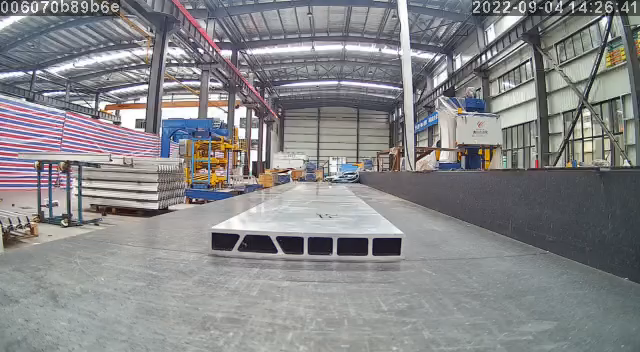

In [15]:
image = Image.fromarray(cv2.cvtColor(img_org.image_data, cv2.COLOR_BGR2RGB))
image

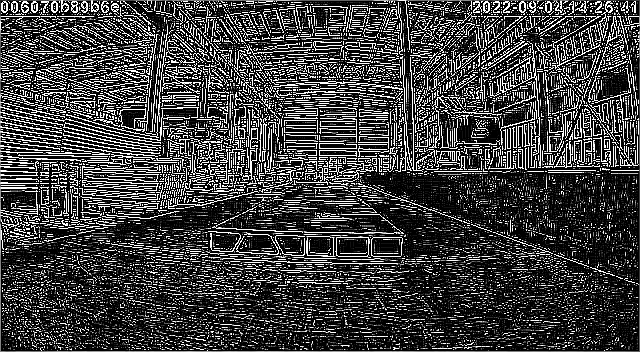

In [19]:
image = image.convert("L")
image = image.filter(ImageFilter.FIND_EDGES)
image

## Reference

- [OpenCV Edge Detection ( cv2.Canny )](https://pyimagesearch.com/2021/05/12/opencv-edge-detection-cv2-canny/)
- [OpenCV Contour Approximation](https://pyimagesearch.com/2021/10/06/opencv-contour-approximation/)
- [OpenCV Smoothing and Blurring](https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/)
- [Bilateral Filtering in Python OpenCV with cv2.bilateralFilter](https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/)
- [Image Filters in Python](https://towardsdatascience.com/image-filters-in-python-26ee938e57d2)
- [4 Point OpenCV getPerspective Transform Example](https://pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/)


-----

- [A Sub-Pixel Edge Detector: an Implementation of the Canny/Devernay Algorithm](https://www.ipol.im/pub/art/2017/216/article_lr.pdf)
- [A Sub-Pixel Edge Detector: github](https://github.com/ibrahimovnijat/Subpixel-Edge-Detection)